In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 10
t0 = 2.
tf = 5.
def x(t):
    return t+1-np.exp(t-1)
def xp(t,x):
    return x-t
def xpx(t,x):
    return 1
x0 = x(t0)

** Forward Euler **

In [3]:
def forward_euler(t0,tf,x0,N,xp):
    ts = [t0]
    xs = [x0]
    h = (tf - t0)/float(N)
    for i in range(N):
        x0 += h*xp(t0,x0)
        t0 += h
        ts = np.append(ts,t0)
        xs = np.append(xs,x0)
    return ts, xs

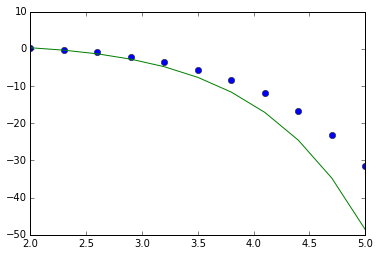

In [4]:
ts, exs = forward_euler(t0,tf,x0,N,xp)
plt.plot(ts,exs,'o',ts,x(ts))

** Adaptive Step **

In [5]:
tol = .1
def adaptive_euler(t0,tf,x0,tol,xp):
    p = 1.
    ts = [t0]
    xs = [x0]
    h = tol
    while t0<tf:
        LTE = 1/2.*h*(xp(t0+h,x0+h*xp(t0,x0))-xp(t0,x0))
        while LTE > 1.1*tol: 
            h = h*(np.abs(tol/LTE))**(1/(1+p))
            LTE = 1/2.*h*(xp(t0+h,x0+h*xp(t0,x0))-xp(t0,x0))
        x0 += h*xp(t0,x0)
        t0 += h
        ts = np.append(ts,t0)
        xs = np.append(xs,x0)
        h = h*(np.abs(tol/LTE))**(1/(1+p))
    return ts, xs

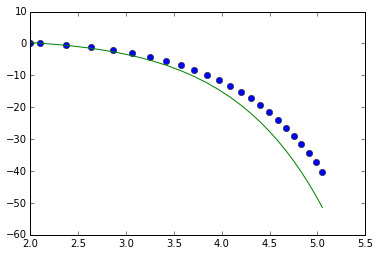

In [6]:
ts, adexs = adaptive_euler(t0,tf,x0,tol,xp)
plt.plot(ts,adexs,'o',ts,x(ts))